# Haulage company APS_FAILURE_SET_ANALYSIS

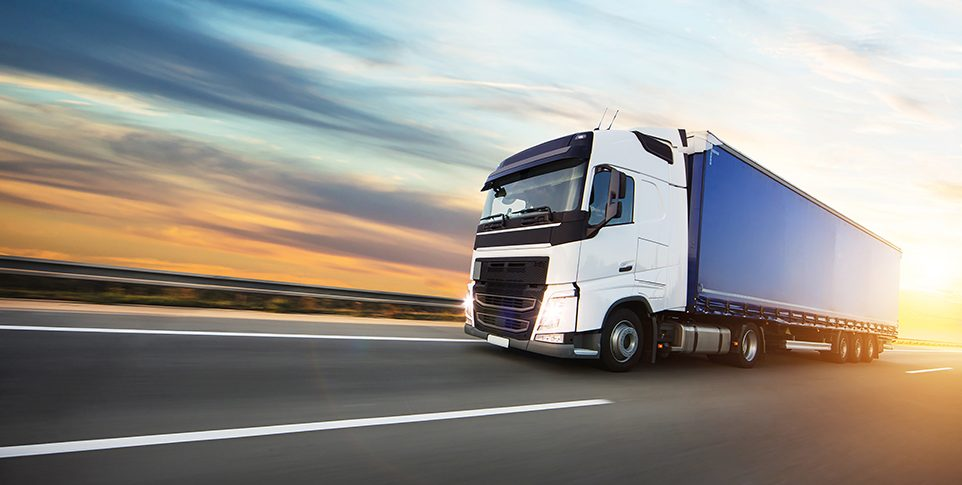

# 1 : Introduction 
### 1.1 What is data
Data are plain facts gathered within a defined context. Statisticians would refer to it as a set of observations contained in variables or columns of varying/unique characteristics. Data can also be referred to as a piece of information after it has been summarised, and when subjected to analysis, data can be referred to as evidence of a hypothesis. Before data can become information and ultimately evidence, it must go through a process. Data analysis is the process in which raw data is ordered and organized, to be used in methods that help to explain the past and predict the future (Hector, 2013). I have been retained by a Haulage company to get information and ultimately evidence from their 'aps_failure_set' data-set and to do this, I will be using the process of data analysis. 

### 1.2 Understanding dataset
Disclaimer: This is a summary of the information provided by David
This data was collected from the everyday usage of heavy Scania trucks by Haulage company. The context in which data has been collected is specifically on Air-Pressure system (APS) and stored in comma-separated value format(csv) file. APS generates pressurised air that is used by different functions in the companies truck. Examples include braking and gear change functions. 

Data has two board aspects to it, the first is failures recorded on different component sensors that have been selected by experts. The second aspect is a class variable, the class variable has both positive and negative classes in it. Positive class is given to component failures, that has to do with failure of a component of the APS. The negative class are failures of component that are not as a result of failure of an APS component.

### 1.3 Objectives
1. Set up GitHub account to tract project implementation 
2. Download and load 'aps_failure_set.csv' load Jupytanotbook in pandas data frame form to allow data manipulation
3. Import appropriate libraries needed for data manipulation
4. Perform in-depth early data analysis
5. Perform data cleaning 
6. Define the Curse of Dimensionality in my words and explain how it will impact analysis from this stage
7. Apply PCA to dataset and get the feature needed to preserve pattern in the dataset
8. With pattern, apply appropriate Machine learning model to dataset to make future predictions

### 1.4 Problem definition
Haulage company wants an analysis of the data collected, to help determine the investment strategy for the upcoming year. 

Company wants an analysis of component failure's to see information of failures related to APS relative to those failures not related to APS. 
They had in system's Dataset stated the positive class consists of component failures for a specific component of the APS system, and it has been stored in csv format.

In summary, I am going to perform in-depth data-analysis to identify APS related failures and those that are not. Furthermore, build a robust model to predict failure of the component. 

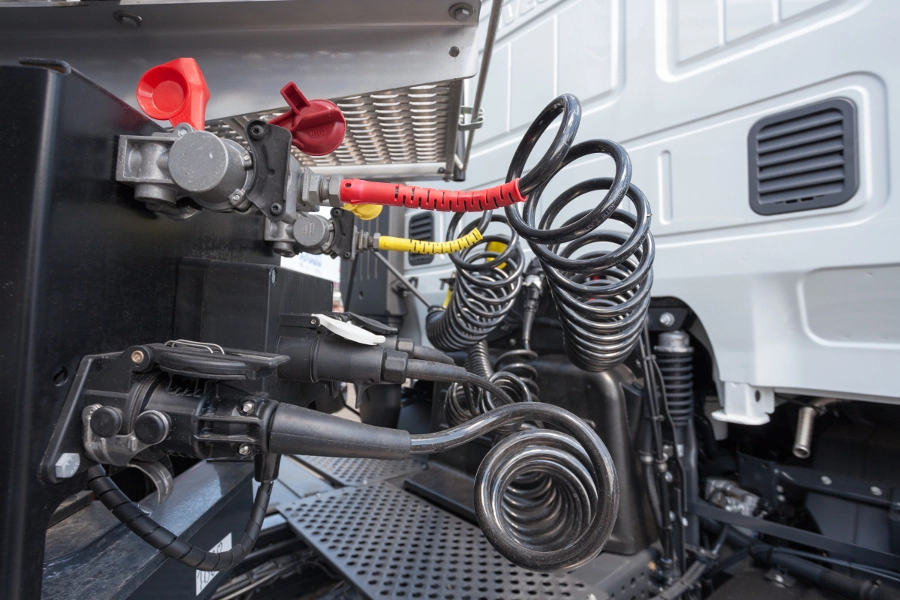
fig.1 Air Pressure system 

In [2]:
#Importing packages i need for EDA
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Early data anlysis (EDA)

In [4]:
# reading dataset using pandas
air_p= pd.read_csv('aps_failure_set.csv')

### loading data 
Pandas(pd) has been used in the first line of code to load the 'aps_failure_set.csv' into a dataframe. A dataframe has a tabular form, column-oriented data structre. It contains both rows and columns (McKenny, 2017). The columns in a data frame have corresponding names called feautures/ variables and the rows are the observation of each feature. Pandas dataframe makes working with the datas in 'aps_failure_set.csv' data set easy, fast and it also enables the manipulation of this data. 

***Eplaining code:*** 'read_csv' funtion from the pandas library was called and the name of the data file was passed as an argument in parentesis and the resulting dataframe is named air_p. The read_csv has been used because the project dataset is in csv format, and naming the resulting dataframe enhances manipulationn of dataframe during project implementation.


In [6]:
#Geeting the first five rows of the data 
air_p.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [8]:
#Getting the last five row of the dataset
air_p.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [10]:
# checking for the size of the data
air_p.shape
#There are 60000 rows and 171 columns

(60000, 171)

In [12]:
# need more infor on the data types 
air_p.info()
#Wecan see that this give a more precice response, stating that the are 170 object i.e columns that are categorical or has
# strings in them making them return object and we have 1 numerical column or has int in its entry which is the class.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [14]:
air_p.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [16]:
air_p.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [18]:
air_p.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

After loading the csv file into a data frame called air_p using the read_csv method in pandas library, to give us an insight into air_p, some methods in the pandas library where implemented to peform specific funtions.
## what (.head and .tail) mean
'air_p.head()' this code was impelemented to display the first few rows of the air_p dataframe. By defualt, the '.head()' method will display first 5 rows using indexing of the entire features in the dataframe. The 'air_p'.tail()' also by defualt returns the last 5 rows of the entire dataframe.  
## .shape meaning 
'air_p.shape', this code was implemented to be able to get the number of rows/observations and features air_p contains. According to result, we have 60000 observations and 171 features in the air_p dataframe. 
## .info meaning
To understand the datatypes of individual feutures, we used the '.info' method from pandas library. 'air_p.info' means calling the info method from pandas and passing air_p as an argument, the output shows us we have 170 objects and 1 integer. This datatypes are contary to the definition of features in the data dictionary.
## .isnull().sum()
This method in pandas is used to check for null_values in the dataset and the '.sum()' method, ask to return only the sum of all the null vales in each variables. 
## .dtypes meaning
To futher understand the datatypes of the features i have in the air_p dataframe, I used '.dtypes' method from the pandas library to to get the datatype of each specific feature, and as shown above, results suggest that the aa_000 is the only column in integer form, and the remaining 170 columns are in object forms. 
## Object meaning
Object simply means that the feutures have some object values in them, this value will override the other value types in the  variable. 
## . describe meaning
In order to statistically explore air_p, '.describe()' method was used from the pandas library. This give a descriptive statistical analysis of dataframe. Howeveer, we were only able to output the statistical description of one feature 'aa_000', this is because .describe method only works for numerical data by defualt, so the integers in aip_p was described statistically. 
#### Result of aa_00 statistical discription: 
1 count: This is the number of observation in the feauture
2 means: This is the average of all the obsevations in the feuture.
3 Std: This mens standard variation of the observation in the feature.
4 min & max: This is the minimum and maximum observations in the feature respectively' 
5. (25 &75)%: This are the ist and 3rd interquatile range respectively.
6. 50%: Is the median and mode of the observation. 
## Datatypes impact
According to the data dictionary, all the component sensors are supposed to be in flaot datatype not object or integer, going forward, code implementation has to be used to explore the features to see the unique objects in them so as to adress them accordingly to bring the futures into the appropraite datatype hence making them usful for analysis. 

## Alot of features
Using the '.shape()' method, I could see I have 171 feautures but the 'air_p' df displays only 20 features. Using the .info method, I can see that my class feauture is object, and only one censure 'aa_000' returns to be integer,and 169 feautures are objects.
I would like to be able to work with individual feauture and explore it. To do this, I will load the dataset in phases using indexing.

In [21]:
# The AP1 df returns the first 20 features and all the rows
AP1= air_p.iloc[ : , :20]
AP1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0
4,neg,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226


The 'iloc' function in pandas is used select sets of values based on specified indexes (w3school, n.d).
'air_p.iloc[ : , :20]' this code has used the iloc function to specify that a new dataframe that has the entire 60000 observations and first 20 columns be returned, and assigned to a new variable AP1. I implemented this code to be able to interact with each feature in the first 20 columns in the air_p dataframe. 
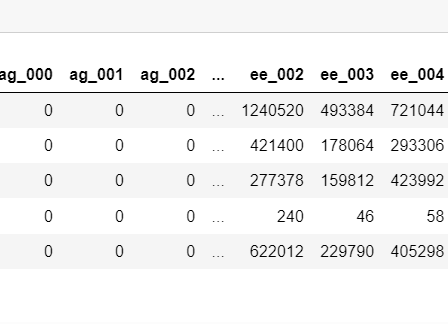
Fig:1


This is because as shown in fig:1 above, the number of features where too large to be displayed in a single dataframe, so pandas displayed first and last 10 columns. With the features having objects in the observations as reveled by the '.dtypes()' method, it is imperative to be able to call each feature to  get the unique values in them. The (.head()) and (.tail()) method where used to display the first and last (5) observations of the first 20 columns. 



In [24]:
AP1.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000
59995,neg,153002,na,664,186,0,0,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,4880368,0,280
59996,neg,2286,na,2130706538,224,0,0,0,0,0,0,104,99186,36564,128,0,0,56982,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,0,28,11592,11538,0,0,0,8784,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,0,330,202498,3251010,2061456,360436,59754,2634394,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,0,1226,46284,1901140,855376,61744,6318,1235850,1926,474


In [12]:
AP1.shape

(60000, 20)

In [26]:
AP1.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
dtype: int64

In [28]:
AP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   60000 non-null  object
 1   aa_000  60000 non-null  int64 
 2   ab_000  60000 non-null  object
 3   ac_000  60000 non-null  object
 4   ad_000  60000 non-null  object
 5   ae_000  60000 non-null  object
 6   af_000  60000 non-null  object
 7   ag_000  60000 non-null  object
 8   ag_001  60000 non-null  object
 9   ag_002  60000 non-null  object
 10  ag_003  60000 non-null  object
 11  ag_004  60000 non-null  object
 12  ag_005  60000 non-null  object
 13  ag_006  60000 non-null  object
 14  ag_007  60000 non-null  object
 15  ag_008  60000 non-null  object
 16  ag_009  60000 non-null  object
 17  ah_000  60000 non-null  object
 18  ai_000  60000 non-null  object
 19  aj_000  60000 non-null  object
dtypes: int64(1), object(19)
memory usage: 9.2+ MB


### storing unique features
1. na

## Exploring each feature in AP1 for unique values
The censor systems all came back as object which means there are some objects in the feautures. I wish to explore the unique features in each columns to be able to fix the datatypes.

In [32]:
# Unique values in class
c_unique= AP1["class"].unique()
print(c_unique)

['neg' 'pos']


'c_unique= AP1["class"].unique()' 
Using .unique method, i checked all the unique values in the class feuture of the AP1 datadrame, and assigned the resulting list to variable c_uniques, and using the print funtion, i displayed the list of unique values in the calss feature. 
Result suggest there are two namely ('neg' and 'pos').

In [35]:
# Getting the unique values in the class column to be able to veiw the integer
# The 'ab_000' column should be integer but we have some missing values in it that has been replaced with 'na'
AP1['ab_000'].head()

0    na
1    na
2    na
3     0
4    na
Name: ab_000, dtype: object

In [37]:
# To get all the uniqe values in the 'ab_000'
# the '.unique()' compared to the '.head()' returns all the uniqe data tpyes i have in the column helping me to see all the
# rows that are not floats
AP1['ab_000'].unique()
# we can see that 'na' is the only type of str we have in the column which represent null values

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

To get all the unique values in the 'ab_000', the '.unique()' compared to the '.head()' used for the class feature, returns all the unique data tpyes in 'ab_000'column helping me to see all the rows that are not floats. 
Result suggests that 'na' is the only type of string we have in the column which represent 'null-values'

The same process was implemented for the remaing 18 component sensors in the AP1 dataframe. This was done by calling the dataframe(AP1) and specifying the name of the variable and passing the '.unique()' method as an argument. 

In [40]:
AP1['ac_000'].unique()

array(['2130706438', '0', '228', ..., '8974', '123514', '2602'],
      dtype=object)

In [42]:
AP1['ad_000'].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In [44]:
AP1['ae_000'].unique()

array(['0', '16', '104', 'na', '2', '222', '4', '290', '1286', '170', '6',
       '806', '1464', '274', '18', '8', '342', '64', '34', '192', '144',
       '176', '1512', '120', '58', '114', '460', '12', '112', '1314',
       '20', '550', '36', '1424', '180', '324', '204', '254', '106',
       '154', '92', '256', '202', '352', '26', '124', '2240', '466',
       '778', '28', '100', '14', '276', '42', '82', '22', '384', '282',
       '386', '98', '164', '108', '86', '38', '266', '1056', '134', '10',
       '200', '150', '326', '350', '398', '424', '32', '128', '752',
       '314', '732', '2312', '400', '158', '668', '30', '212', '224',
       '950', '4726', '60', '226', '388', '640', '258', '62', '206', '44',
       '414', '458', '78', '492', '308', '52', '50', '162', '24', '662',
       '536', '456', '130', '140', '184', '368', '146', '118', '138',
       '872', '530', '1118', '356', '218', '126', '102', '1130', '12048',
       '1508', '396', '374', '658', '816', '556', '216', '66', '760

In [46]:
#Also has 'na'
AP1['af_000'].unique()

array(['0', '10', '20', '172', 'na', '30', '2', '296', '452', '1384',
       '488', '4', '6', '3220', '1808', '538', '14', '12', '274', '78',
       '22', '330', '188', '160', '8', '746', '238', '64', '164', '362',
       '410', '24', '294', '198', '54', '834', '32', '2704', '324', '766',
       '206', '2706', '156', '250', '2430', '154', '252', '170', '358',
       '4768', '46', '1320', '1776', '680', '576', '114', '96', '98',
       '28', '44', '132', '876', '572', '332', '368', '514', '242', '104',
       '26', '404', '240', '178', '352', '394', '642', '930', '456',
       '620', '316', '614', '52', '808', '2240', '1970', '1082', '42',
       '1358', '244', '508', '120', '1290', '6506', '60', '304', '226',
       '558', '138', '212', '372', '2844', '484', '56', '266', '100',
       '184', '34', '190', '878', '350', '982', '292', '1002', '40', '86',
       '288', '216', '2648', '36', '48', '460', '256', '224', '298',
       '510', '424', '110', '1054', '18', '1440', '536', '732', '10

In [48]:
# Also have 'na' as unique
AP1['ag_000'].unique()

array(['0', '3382', 'na', '776', '2', '4808', '12', '4372', '11912',
       '454', '13044', '16186', '29794', '876', '8', '34', '63896', '64',
       '3376892', '299736', '206336', '51610', '4436', '16', '242', '104',
       '16462', '21000', '7002', '30', '228', '850604', '170', '760',
       '28', '58096', '6', '268780', '1722', '7212', '8252', '1262',
       '19442', '4', '24', '3718', '223654', '306898', '246', '17706',
       '406', '15626', '14630', '96954', '69054', '544866', '1540',
       '17280', '32', '196', '326', '3272', '1170', '127544', '48', '62',
       '1354', '550', '443614', '22', '48820', '20614', '2664', '234',
       '316', '11486', '318', '22320', '998', '8870', '67966', '50066',
       '1266', '206', '510', '48020', '6772', '2088', '676', '44212',
       '10682', '26884', '156', '360', '136', '1994', '256', '58270',
       '60334', '26', '14', '15980', '2710', '35888', '6604', '124',
       '116', '1134', '82', '45862', '58806', '11184', '1314', '204',
       '

In [50]:
#Also has 'na'
AP1['ag_001'].unique()

array(['0', '49536', 'na', '244', '281128', '8632', '50394', '1430',
       '14868', '1280', '2', '312', '215720', '140526', '15166', '34244',
       '6086', '2716', '12', '126', '66', '1094', '3564', '1342', '1566',
       '29190', '34934', '86114', '530916', '96944', '68084', '4538',
       '14450', '502', '34', '34864', '37656', '16532', '1752', '3268',
       '1152', '2348', '660', '448', '6138', '19702', '226226', '83006',
       '136', '4262', '304856', '402040', '12010', '18644', '21072',
       '22614', '10498', '321850', '53878', '24350', '186574', '4822',
       '98586', '2698', '4058', '75826', '4712', '26', '15148', '3430',
       '174', '60', '7824', '135062', '232', '26212', '221266', '582',
       '634', '6782', '115488', '68452', '15952', '732', '7762', '1218',
       '4686', '28762', '15592', '3642', '14', '1522', '21028', '290132',
       '187392', '1096', '7048', '64', '24', '40456', '1516', '428',
       '1586', '13986', '618212', '46562', '35414', '131050', '294',


In [52]:
AP1['ag_002'].unique()

array(['0', '9744', '222', ..., '17526', '9904', '5744'], dtype=object)

In [54]:
AP1['ag_003'].unique()

array(['0', '318', '11804', ..., '8348', '9046', '18118'], dtype=object)

In [56]:
AP1['ag_004'].unique()

array(['37250', '18254', '1648', ..., '43536', '32154', '59100'],
      dtype=object)

In [58]:
AP1['ag_005'].unique(),
AP1['ag_006'].unique(),
AP1['ag_007'].unique(),
AP1['ag_008'].unique(),
AP1['ag_009'].unique(),

(array(['0', '660', '876', ..., '5116', '29422', '59754'], dtype=object),)

In [60]:
AP1['ah_000'].unique(),
AP1['ai_000'].unique(),
AP1['aj_000'].unique(),

(array(['0', '68', '226', '80', '64', '58', '32', '11548', '682', '992',
        '302', '70', '31432', 'na', '154', '230', '174', '42', '36', '60',
        '124', '86', '110', '106', '16650', '92', '468', '50', '2542',
        '122', '562', '46', '402', '24', '38', '26', '196', '42544',
        '2782', '40', '326', '62', '198', '28', '56', '108', '126',
        '426786', '164', '240', '216', '88', '84', '4', '48', '252', '286',
        '278', '420', '12830', '144', '180', '100', '66', '186', '134',
        '150', '78', '132', '204', '370', '44', '168', '208', '210',
        '8832', '102', '8', '4714', '94', '2206', '774', '34', '140',
        '318', '74', '104', '146', '260', '90', '270', '96', '316', '294',
        '195754', '224', '170', '12', '444', '242', '334', '18', '284',
        '16', '176', '156', '436', '54', '76', '292', '972', '274', '412',
        '200', '184', '136', '52', '118', '14', '128', '400', '232', '190',
        '72', '178', '324', '328', '27384', '82', '1734', '

# Finding in AP1. 
Using the '.unique()' method i was able to see the unique values in each column. 'na' is an object and it was returned in majority of the AP1 df. However, some features in AP1 did not have 'na' in the returned array. 

## Using function to iterate throught the entire df

### Why am i doing this
The dataset has high dimension, i could continue to use the method which i used for AP1 for the remaining 7 df's if i break aip_pressure.csv down to 20 columns per df. But as seen in ['ag_002','ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008','ag_009, 'ah_000'.'ai_000','aj_000'], not all the unique values were returned because 'unique()' method simply mean evething unique, and in the columns stated above, the unique values where much so the ram could not display all at once leaving some blank inbetween. This will not serve the purpose i want to achive which is to see all the unique dtypes in my columns so as to be able to adress them accordingly.

In [29]:
# Not working, try somthing else...

# This is a function that filters the columns in a dataframe to get the uniqe str values.
# i want try this function to filter my dastaset
def get_str(df): #This line initiate the funtion definition using the 'def' method and naming the function 'get_object'
                    # And df as agument to represent dataframe
    str = []    # This opens and empyty list where the objects found in the dataset would be stored assigned to objects

    for row in df[column]:# using for loop,"For the column in a df"
        for row in df[column]:# "For the obsevations in the columns found in the df"
            if isinstance(row, str): #"If the the obsevation you see is a string"
                 str.append(row)  # "Add the obsevation to the Object list". With the append method, am ensuring that no
                                    # observation replaces another in the list, the append keep adding to the list.
    return str # "Return the list object". This will produce a list of all the objects in my df at once.

In [30]:
# Not working 

# Trying the funtion with a subset df
#all_unique_str= get_str(AP2)
#print(all_unique_str)

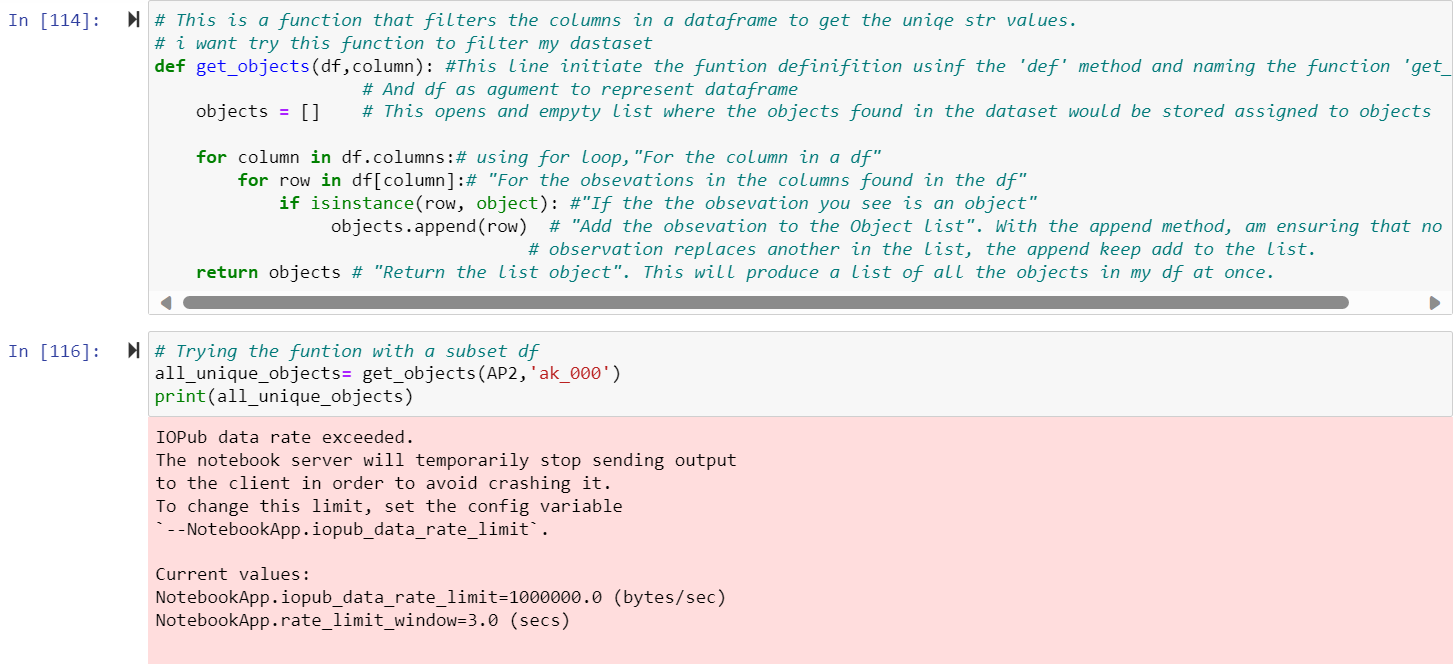
Fig:2

## Error message explanation
"The code you provided seems to be exceeding the IOPub data rate, which is the rate at which data can be sent between the kernel and the front-end. This can happen when there is a large amount of output being generated by the code" (AI Code mentor, 2023).
As shown in fig:2 above, i tried to use a function to get all the 'str' in my entire df. I tried calling the funtion and passing df 'AP2' which is a subset of df 'aip_p' as agument for trial. The result generated suggests that the output the function is generating is  large and the output has exceeded the data rate which is a contrary output to what i was hoping to get 'na'. I was expecting 'na' and possibly oythers because 'na' i have seen it come up in diffrent component colunms. 

## Plan going forward. 
Why is there so much output? I was expecting "na" and probably few other objects not so much to exceed data rate.

***whats an 'object'?***
"Objects are variables that contain data's and functions that can be used to manipulate the data. The object's in data can vary in types (string, integer, etc.)"(Hubspot , 2023). According to this author, my undersanding of object now is that it is a variable, and it can hold diffrent datatypes in it. Therefore, my component columns that returned objects as their dtypes does not necessarrly mean that i have only floats according to data dictionary and str 'na' according to output from '.unique()' method alone in component variables, they may contained a lot more diffrent datatypes which is why the function 'get_objects' is returning the exceeded limit message. 
Furthermore, Python is an object oriented programming language, everything in it has its properties and methods (W3Schools, 2019). This suggests that Objects can hold data's of diffrent properties in it. 
With this, it seems function 'get_object' can not performe what i intend to use it for which is to print only 'str' dtypes. 

## Using regular expression to get str
Regular expressions also called (regex or re) are specialised programming laguage in python, which can be used to set the pattern of the string i want to match (Kuchling, 2019). (Gupta, 2023) further defined regular expression as a squence of metacharacter that defines a search pattern, pattern which can be used in a string search algorithm to 'find' or 'find and replace' a string.

Having observed that 'na' is present in some if not all the component sensor features with exception to 'aa_000', i want to use regrex language to match 'na' and other string that might be present in air_p dataframe. 

(Kuchling, 2019) reported extensively on diffrent special sequences/ metacharacters contained in the regrex language for example '\d' is a metacharacter that matches any decimal digits equivalent to class[0-9]. 
#### Problem
I have 169 features that contain characters that are not digits hence making pandas to overwrite other numerical observations as objects contrary to my data dictionary. To be able to adress this problem, i need to know the strings present in these varibles to replace them accordinging.

To do this i would be using '\d' metacharacter in regrexs to match all decimal digits character, ths is equivalent to [0-9](Kuchling, 2019)

In [66]:
# Trying the synthax on a subdata
APs_unique =air_p.replace ('\d+', '', regex = True)
APs_unique.head(-5)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\oladi\AppData\Local\Temp\ipykernel_18540\651229795.py:2: SyntaxWarning: invalid escape sequence '\d'
  APs_unique =air_p.replace ('\d+', '', regex = True)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,,,,,,,,...,,,,,,,,,,
1,neg,33058,na,,na,,,,,,...,,,,,,,,,,
2,neg,41040,na,,,,,,,,...,,,,,,,,,,
3,neg,12,,,,,,,,,...,,,,,,,,,,
4,neg,60874,na,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,na,,,,,,,,...,,,,,,,,,,
59991,neg,39308,na,,,,,,,,...,,,,,,,,,,
59992,neg,14,,,,,,,,,...,,,,,,,,,,
59993,neg,0,,,,,,,,,...,,,,,,,,,,


#### code syntax: 
.replace(pattern, string, regrex= True) (Kuchling, 2019)
'.replace' is a function in pandas that is used to replace value in a dataframe. 
"\d+'": Is a regular expression that mathches decimal digits. 
#### Code explain 
The '.replace' function has taken in three arguments in this line of code. The first argument "\d+'" as earlier defined is a regular expression that matches decimal digits. Regular expression has many other metacharacters but i have chosen this because 90% of my obsevations are floats and the goal of the code is to separate the correct observations from the observations not in the right format. Additionally, the '+' sign in "\d+'" was added to ensure that not one but all the floats are matched from the air_p df. The second argument is an empty parentesis, this according to the sytax is the replacement value for the matched flaots. The statement specifies that the function should replace matched float with empty string i.e leave the cell empty. The third argument is specifying that the first argument is a regular expression and should be treated as such. 
In conclussion: The code will replace all floats in the 'air_p' df with empty string and return a new dataframe called 'APS_unique' which contain only unrecognised values such as 'na', 'int' and 'str' in the 'aa_000' and 'class' feature respectively. This code helps me to see the unique string in the entire air_p df.
Finally the first and last 5 rows were called using .head method and -5 index. 

In [68]:
for column in APs_unique: 
    print(sorted(APs_unique[column].unique()))

['neg', 'pos']
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414,

The code above uses for loop to iterate through each column in the new df "APS_unique", and print out all the unique values using the ".unique" function. The ".sorted()" function specifies that the unique values should be arranged in ascending order. This print fuction finally displays the unique values in assections order. 
#### Why?
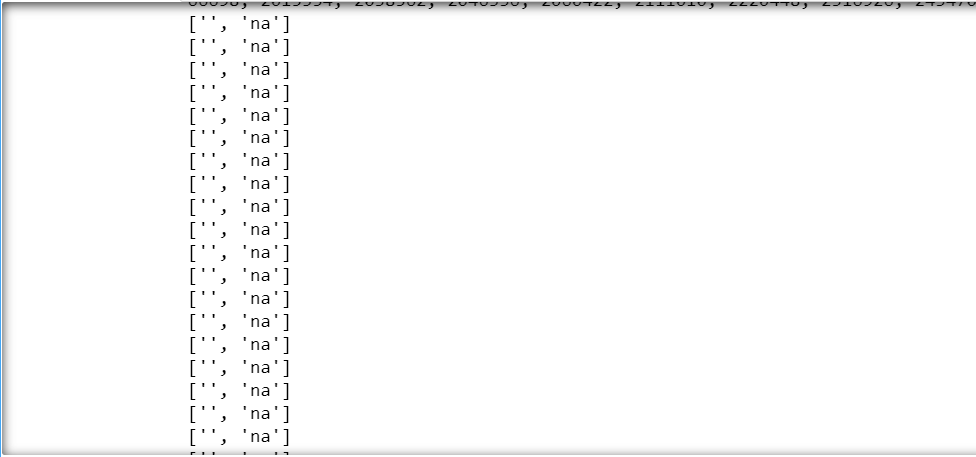
Fig:3.

As shown in fig:3 the 'for' loop was able to produce the unique string in all the columns, this will help me to specify how pandas should treat this values in the code below.

In [71]:
missing_value_formats = ['na', '', '.']
df= pd.read_csv('aps_failure_set.csv', na_values = missing_value_formats)
df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


## Converting 'na','.', '' to null_values(NAN)
Using regular expression i was able to extract the unique strings in the air_p dataframes. The following unique strings:['na', '','.'] where found. The 'na' is a string that represents null-values, i create a list containg ['na', '','.'] and assigned it to a new variable, 'missing_value_format', then reloading the 'aps_failure_set.csv' dataframe and passing an argument that specifies that "anywhere any unique character from the list is seen in the 'aps_failure_set.csv', it should be  assigned nullvalue (NAN). This operation is assigned to a new variable called "df", the '.head()' method is then used to return the first 5 rows in the df

In [74]:
#Checking the types now. 
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [76]:
#object; 1
#int64; 1
#float64;169
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [78]:
df.shape

(60000, 171)

## Findings after replacement
Now components ['ab_000'-eg_000] which represents 169 out of my 170 component variables are now floats, this suggests to me that the strings have been replaced with null(NAN), changing the dtypes of those component variables from objects to floats. 
Data type been output as float means that all the rows in ['ab_000'-eg_000] component variables are now float except the rows containg NAN.
However, one of components sensors 'aa_000' is still an integer, which is an incorrect format it should be in. According to the data dictionary, it should be a float.
The component 'aa_000' data type been an integer suggests to me that one or more rows in this variable is an integer not floats. 

In [81]:
#Data type conversion from pandas 
aa_f= df['aa_000'].astype(float) 
aa_f.head()

0    76698.0
1    33058.0
2    41040.0
3       12.0
4    60874.0
Name: aa_000, dtype: float64

## Conversion of integer to float 
Synthax: df['column'].astype(float) 

The '.astype()' in pandas can be used to cast a pandas object to specific datatype (Pandas, 2023). This function is more ideal for converting component sensors to their appropraite data types namely float. 
Using the '.astype()' as shown above, i have converted the observations in the 'aa_000' component variable to float from integer. The df is the dataframe and [a_000] specify that the operation should be carried out on 'a_000' column alone in the df dataframe, astype function is called and float is passed as an argument specifying that the values in the column should be converted to float. 

## Converting all components sensors to float
df.drop(columns=['class']) : columns=['class'] specifies that the 'class' column in df should be dropped Using the '.drop' method.

Using the '.astype()' i was able to convert the a_000 sensor component to float. However this change was not implented in my main df because i assigned the operation to variable aa_f. 
Since all the component variables are floats according to data dictionary, i am going to drop class from my main(df) using the '.drop' method and assing the new df that has no class it to 'df_no_class', while still holding my class variable in df dataframe. Then convert 'df_no_class' to float and assign this float df to 'df_all_float' as shown below.

In [85]:
df_no_class=df.drop(columns=['class'])
df_no_class.head(3)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0


In [87]:
df_all_float= df_no_class.astype(float)
df_all_float.head(3)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0


In [89]:
df_all_float.dtypes

aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 170, dtype: object

In [91]:
# Now all 170 component sensor are now floats
df_all_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(170)
memory usage: 77.8 MB


In [93]:
aps= df_all_float

"aps= df_all_float", assigns df_all_class to new variable asp for easy manipulation. 

In [96]:
aps.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


## Describe observation
The describe method shows that all the data are highly swed. Some of the features show right skewness, this is when the mean is bigger than the median and mode. On distribution plot, the median line is moving towards the right i.e bigger numbers. Some of the feutures also apperaed to be left skewed, this is when the mean is lesser than the median and mode. This is because the on distibution  plot the median is moving towards the smaller numbers. 

In other to visualise this pattern in of the features, i am going to use box plot. 

## EDA visualisation
As revealed by discriptive statistical analysis, majoririty of the feutures in 'aps' df are severly skewed. "Skewed data often occur due to lower or upper bounds on the data. That is, data that have a lower bound are often skewed right while data that have an upper bound are often skewed left" (NIST, 2023). This means that distribution are not symetrical. This disparses distribution however cannot be seen just looking at the observations, which is why i want to visualise the feature to be able to see visually the pattern of distribtion of the values in them. 

### Type of visualisation
#### Boxplot
Boxplot among other plots is used to show the distribution of a quantitative data to facititate comparison between variables (Waskom, 2023). Boxplot shows the distribution of numerical data using five key information namely: 
1. Interquartile range(IQR)1 and 2: The IQR 1 and 2 represent the upper 75% and lower 25% respectively. The IQR 1 are the values under the mimimum line and the IQR2 are the values above the upper maximum value line,
2. Median : Median marks the mid-point of the observations in the variable. It is represented by a line in between the min and max line in the plot,
3. Maximum value: This is the maximum value in the variable,
4. minimum value : This is the minimum value in the variable,
(Wellbeing@school, 2019).

This makes it ideal for visualising the highly skewed features in the 'aps'dataframe. We would be able to see the values that does not follow other distributions in each variable this values are called ***outliers***

To do this we need to import the saborn library which had already been done in the first line of code as shown in fig:4.
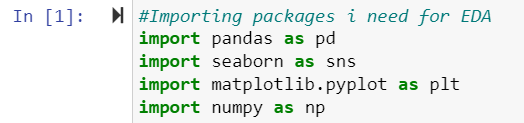
Fig:4

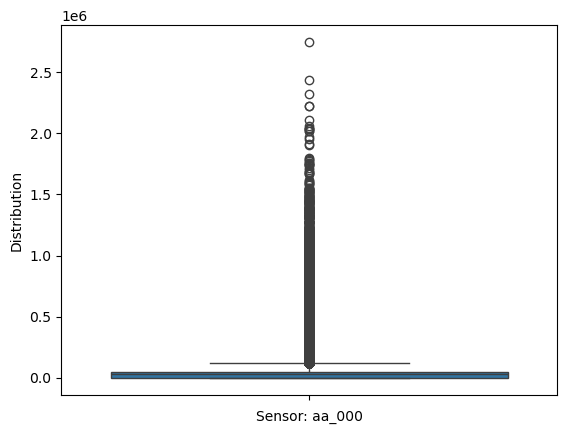

In [100]:
sns.boxplot(data=aps["aa_000"])
plt.xlabel("Sensor: aa_000")
plt.ylabel("Distribution")
plt.show()

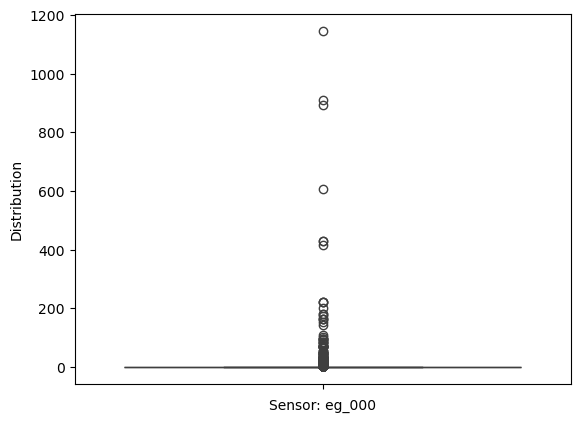

In [102]:
sns.boxplot(data=aps["eg_000"])
plt.xlabel("Sensor: eg_000")
plt.ylabel("Distribution")
plt.show()

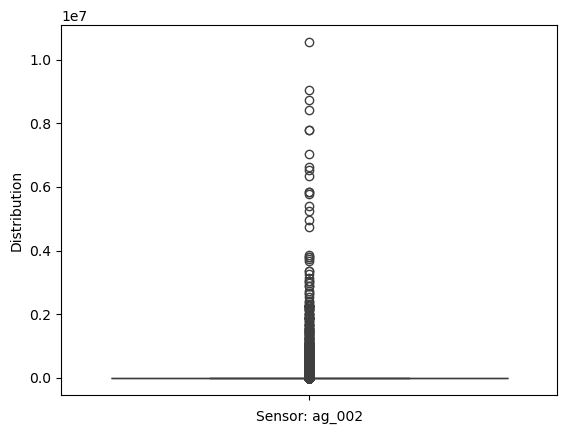

In [104]:
sns.boxplot(data=aps["ag_002"])
plt.xlabel("Sensor: ag_002")
plt.ylabel("Distribution")
plt.show()

Syntax = sns.boxplot(data=df["column"])
The boxplot method have been called from the seaborn library. This takes in one agurment, which is the dataframe and the specific column we want to plot. 
### Plot Interpretation
The first plot displays the distribution of sensor : "aa_000"
'Plt.xlabel' uses the pyplot from matplotlib library to specify the x-axis name as 'sensor: aa_000' and 'plt.ylabel' specifies that y-axis be named 'distribution', this labelling enables comprehension for the reader. 
'plt.show()' method was used to display the box plot. 
    As show in the first plot, the min and max values are between (0.0 - 0.5), plot suggest that majority of the observations are above IQR3 and the midian is not at the centre of IQR 1 AND 3 which suggests that the column is highly skewed. 
***second plot:*** This shows the distribution of 'sensor:eg_000'.
PLot suggests that majority of the observations are above IQR3. However the median, IQR1 AND 2 are represented as a single straight line on 0.0.
***Third plot:*** This shows the distribution of 'sensor:ag_002'.
PLot also suggests that majority of the observations are above IQR3. However the median, IQR1 AND 2 are represented as a single straight line on 0.0.

Bearing in mind that there are still NAN in some of the variables that have not been handled, does this have an effect on the distribution? 
### Next plan
To answer this, i will have to deal with the missing values to see the effect it has on the distribution. 

## Data cleaning
### Dealing with null value

In [108]:
aps.shape

(60000, 170)

In [110]:
aps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(170)
memory usage: 77.8 MB


In [112]:
# A lot of null values, i cant drop then as this may impact the pattern in my data.
aps.isnull().values.any()

True

In [114]:
aps.isnull().sum()

aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 170, dtype: int64

***(aps.isnull().value.any())***
This is a method in pandans that is used to check if there are any null values in a df or series. 
In aps df, the method return boolean True, which mean that the operation had found at least one null value in the aps. 
***(aps.isnull().sum())*** 
This method in pandas as above also checks if there are null values, however, unlike the initial method, this method add '.sum()' from pandas to it. This does not only check for null values, this additionally count and sums up the count of rows that are NAN in each column. 
According to this result, it is evident that out of all diplayed features, over 77% of 'ab_000' sensor component are null values. This is a significant higher ratio of empty rows to acutual recorded obsevations. 

In [117]:
aps.drop(['ab_000'] ,axis=1, inplace = True) # Drops the ab_000 column

In [119]:
aps.shape

(60000, 169)

In [121]:
aps.isnull().sum()

aa_000        0
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 169, dtype: int64

In [123]:
#No duplicated values 
aps.duplicated().values.any()

False

### Dealing with null-value in "ab_000" column
***(DATA CLEANING NOTE, 2023)*** NAN can be dealt with in two broad methods:
1. Drop method
2. Inputation method
This column as too many null-value to all for trying to correct the missing values while still trying to retain the trunessof the data to a resanable extent. (Eddie_4072, 2021), reported that in extreme case when the ratio of null value is significantly higher than the ratio of actual recorded observation, it is safer to drop the variable. Reasoning with author's judgement, and also pulling from knowledge from data cleaning class, i find it justifiable to drop sensor 'ab_000'.
#### Implementation
To do this, i used the ***syntax:'aps.drop(['ab_000'] ,axis=1, inplace = True)'*** 
This code uses the drop method to deal with the null values ab_000 variable. This is when the rows or columns containing null values are dropped ***(Data cleanig note, 2023)***
Code mean "In aps df, using '.drop()' function, drop/delete 'ab_000'.  axis= 1 is an argument used to sepcify that the drop should be performed on the column not row, and inplace = True, is used to specify that the operation should be performed in the main dataframe 'aps' without creating a new one. 
The '.shape()' was used to check if ab_000 has been dropped, result suggest it has been dropped, as the number of column reduced by 1. To be sure, the '.isnull()' method us used to check, out put confirms 'ab_000' had been dropped.


## Dealing with null_values in the rest of the component sensor features
Going by the information available through using the isnull and sum methods in pandas, output shows that the rest of the aps column visible also have null values however, the ratio of their null values is smaller compared to actual observations recored. 
The null values in the rest of the component sensors are much but not as significant compared to the real observations recorded. Over 80% of the observations in the rest of the component sensors are recorded. 
To be able to choose the right way to deal with this null-values we must consider the decriptive statistical analysis of this feature. With the '.describe()' method used during EDA we were able to see that aps variables are significantly skewed. Some varaiables are left skewed, while some are right skwed meaning that in some variables, the mean is greater than the median while in some the mean is lesser than the median. Based on this information, the inputation method seem appropriate in this case.
### Input Method consideration
Whiles considering the most effective method to input the null values with, it is worth noting that authors have argurged there is no method of inputation used to replace null value that would not introduce some sort of bias in our data, it is always a question of what is the most efficient method based of the information available in our data ***(data cleaning note, 2023)***.
***Using Statistical values*** such as mean and median is an example of a way of replasing missing values ***(data cleaning note, 2023)***. (Gawali, 2021) reported that mean values can be used to replace numerical data when the data distributing is not skewed. Considering the result of aps df descriptive statistics, result shows that aps is highly skewed so mean would not be appropriate. Median on the other hand is more robust, not sensitive to outliers and is appropriate to use when the data we are trying to fill is skewed Gawali, S. (2021). 
This makes logical sense considering mean is calculated by averaging an entire distribution, which would include extreme value if present. If mean is used in this case we would be introducing a high bias into our data. Mathematically median is the middle value or middle average of a distribution, it does not take into consideration the extreme values on the left or right of a distribution hence not impacting the truness of the data too much as the value that would most likely be imputed are still within 3 standard deviations to the right or left of the median. 

***Interpolation:***(code-mentor.ai, 2023) defined interpolation as a technique used to estimate missing values based on the values of neighboring data points. Based on this definition it seems to me using interpolation method is introducing a lot of bias into out data. The component sensors are not expected to generate there observation based on a pattern known to us, using interpolation considering which ever method or direction specified in the sythax will force the pattern to follow a direction.

#### Conclusion
The missising values in the remaining component sensors will be replace with meadian values in each variable, this as reported ensure reduced bias in data distribution.

### This is replacing with mean cont here 

In [128]:
replace= aps.median()
aps.fillna(replace, inplace= True)
aps.isnull().sum() #all null values are replaced 

aa_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 169, dtype: int64

In [129]:
aps.isnull().values.any()

False

#### Implementation
To replace the null-values in the remaining component sensors with median the following was done:
The first line 'replace= aps.median()' passes the median method from pandas into 'aps' dataframe, and the operation was assigned to the variable 'replace' 
The 'fillna()' method allows for the replacement of null-values with a specific value. In this operation 'fillna()' has been used to replace the null-values in 'aps' with the median of each column. 'inplace=True' specifies that the operation be performed in the main df i.e 'aps' without creating a new df.
Finally, the 'isnull().sum()' has been used to check for the sum of null-values in each column if any is found.

In [133]:
aps. describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,4.322495e+05,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,2.361408e+06,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.180000e+02,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.672000e+03,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.812400e+04,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


The 'aps.describe' statistically summarises the dataframe again, i did this to check the impact of median inputation had on the data distribution. In comparison with the initial statistical summary, there where no visible changes to the values in addition to the NAN been replaced by median of each feature. 

## CLass EDA 

In [137]:
df_class= df['class']
df_class.shape

(60000,)

In [139]:
#Decribing the values in class
df_class.describe(include="object")

count     60000
unique        2
top         neg
freq      59000
Name: class, dtype: object

In [141]:
df_class.duplicated().sum()

59998

In [143]:
#The class variable has no null values
df_class.isnull().sum()

0

I separated the class feature from the main dataframe when converting the observations in component sensors to float. 
"df_class= df['class']
df_class.shape"
class feature was extracted from the df dataframe, and assigned to a new varible called 'df_class'. The shape() method was used to check the number of rows and column in 'df_class', result suggest that there are 1 column and 60,000 observations. 
"df_class.describe(include="object")" the '.describe()' method by default return the descriptive statistical analysis of numerical data, class on the other hand is a qualitative data, the (include= 'oject') was passed as an argument to specify that categorical datas should be discribed as well. 
Result suggest that there are 2 unique values in class variable, and the top: neg, say the neg values appears 59000 times. 

## Curse of Dimentionality
The word features have been introduced in the introduction as columns names in a dataframe, it can also be called attribute/variable. To define curse of dimentionality, it is important to understand what dimension means in a dataset. Dimention in a dataset is the number of feature that exist in a dataset. In our dataset, we have 171 dimensions intially which after cleaning we are left with 170. In data analysis, this number of features make this data a highly-dimensional data. 
Curse of dimentionality is a problem in analysis, it is a set of problem that arises when we have a highly-dimentional dataset like we do in this project. An increase in the dimentionality of a dataset, results in an increase in the number of data/ observation required to be able to draw meaningful conclusion from the dataset, this in nutshell makes it difficult to work with this dataset. In our dataset, it was difficult to visualise each feature during EDA to see pattern of distributions in them. This is one of the set of problem that highly-dimentional dataset causes, the efficiency of analytical tools were reduced due to the large number of features making computational processing complex. A highly dimentional data also reduction computational power.

## Impact of curse dimentionality on analysis
With the ability to get reliaible result been highly reduced in highly dimentional data, to be able to work with this dataset,we have to reduce the dimention of data to only relevent dimentions needed to keep the pattern in the data. Going forward Aps df observations would have to be subjected to principle component analysis to get the required number of feutures needed to keep 99.5% of data. PCA is a dimentionality reduction technique.


In [147]:
aps.isnull().sum()

aa_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 169, dtype: int64

## Normalisation of data

### Min-Max scalling:
Data normalisation is the process of structuring data according to normal form (Morris, 2022). We perform normalization as part of peprocessing technique which is used to adjust feature values in a dataset to a common scale (Bhandari, 2020). Normalisation is important because models that involves matrixs e.g linear regression are affected by the scale of input. "Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1"(Bhandari, 2020), and it is also refered to as Min-Max scaling. 
Statistical summary of our dataset show that data is highly skewed, and in addition to been skewed, the diffrence metween the minimum and maximum values in some of the feutures are over 20000. If this fact is ignored, and the data in its current form is feed into model, the larger attribute would affect the model escpecially modles that  that involves matrixs (Gupta, 2022).
Min-Max scalling has been chosen becasue it is Useful when the distribution of the data is skewed or unknown (Bhandari, 2020).

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
aps_scaled = scaler.fit_transform(aps)
aps_scaled

array([[2.79250729e-02, 9.99999832e-01, 3.26176944e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00, 1.46779625e-08, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 1.07006746e-07, 1.16491766e-08, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 9.99999829e-01, 2.09685178e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 5.75469322e-08, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 3.27590826e-07, 7.31568288e-08, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

The code above imported MinMaxScaler class from 'sklearn.preprocessing'.

## Principal component analysis
Principal component analysis is a dimetionality reduction technique that helps us to transform a highly dimentional dataset to a new one whiles holding the true pattern of the previous data subjected to pca. 
To be able to reduce the dimentionality of our dataset we have to do the following:
1. Get the variance of the data.
2. Check how many features is required to hold  99.5% of variance 
3 Fit transform dataset with feature modification. 
The goal of pca is to reduce to the dimentionality of the data, but still hold to a larger extent the same patern in it as the initial dataset meaning reducing dimentionality while retaining the main variance of the data.

However, before we apply pca, we must drop our dependent variable because we are not applying pca on dependent variables. This has been done in an earlier step

In [157]:
# Import pca library
from sklearn.decomposition import PCA
# Get the pattern in the data 

pca = PCA().fit(aps_scaled)

Above code imports the PCA model from the sklearn.decomposition library. The next line begins an instance of the PCA class and pass the aps dataframe into the fit method. This code will analyze the principal components of the data.

In [160]:
print(pca.explained_variance_) 

[2.60999182e-01 1.71251060e-01 1.30451315e-01 6.20259360e-02
 1.77454709e-02 1.50309518e-02 5.87493646e-03 5.50826833e-03
 4.88581355e-03 3.71961499e-03 2.89587854e-03 2.61341637e-03
 1.83994992e-03 1.74781086e-03 1.71102545e-03 1.52274680e-03
 1.20574385e-03 1.01352744e-03 9.91335868e-04 8.60763100e-04
 7.45913459e-04 7.17230709e-04 6.82894532e-04 6.35566355e-04
 5.77123414e-04 5.44181749e-04 5.16909590e-04 5.05474483e-04
 4.68827722e-04 4.36834510e-04 4.09938473e-04 3.71181432e-04
 3.62249726e-04 3.58081784e-04 3.28949079e-04 3.22550969e-04
 3.05185103e-04 2.97451953e-04 2.92949542e-04 2.58175118e-04
 2.45374179e-04 2.33856131e-04 2.32566696e-04 2.24999926e-04
 2.17259299e-04 2.03729241e-04 1.98758880e-04 1.89468814e-04
 1.82221818e-04 1.81473106e-04 1.67563337e-04 1.65736194e-04
 1.60344158e-04 1.54014309e-04 1.48679605e-04 1.39880858e-04
 1.39111547e-04 1.34233484e-04 1.31261077e-04 1.26578365e-04
 1.21819899e-04 1.18306303e-04 1.12846868e-04 1.07494162e-04
 1.04976836e-04 1.004830

the code above uses the print funtion to output how much variance of the aps dataframe is captured by a component i.e the amount of pattern retained with a certain number of features.

## Plot the pattern found
using Matplotlib we can visualise the variance that a particular number of component would hold from the origical dataset i.e 'aps'.

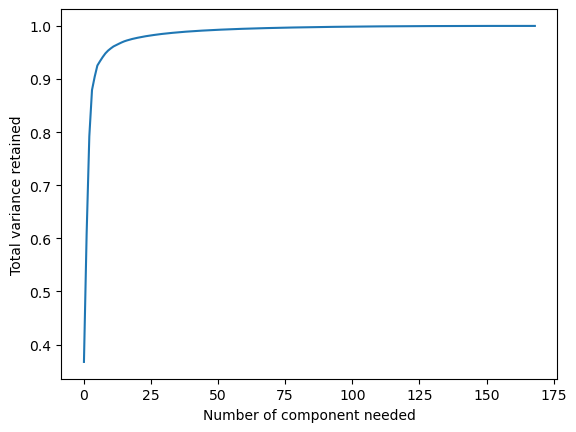

In [164]:
pca = PCA().fit(aps_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel ("Number of component needed")
plt.ylabel ("Total variance retained")
plt.show()


first line of code is applying PCA modle to aps dataset, this calculates the amount of component required to hold a percentage of variance in the 'aps', this operation is then assigned to variable 'pca'.
The second line of code utilise matplotlib visualisation tool which has been earlier imported as plt to create a line plot of calculated cummulative sum of explained variance, against the number of components required to produce such variance.
The third and forth line of code specifies that the x-axis and y-axis should be labelled 'number of components needed' and 'Total variance retained' respectively. 
The final line of code displayed the plot. 
### Findings
According to the plot, aproximately 25 feautures will be required to keep 99.5% of the explained variance. 

Before normalising my data, the pca explained variance was almost not tracable. 

In [167]:
#Sepcifying i need just 20 features
pca= PCA(25)
aps_t = pca.fit_transform(aps_scaled)
print("original shape:   ", aps_scaled.shape) 
print("transformed shape:", aps_t.shape)
# now fetures have been transformed to 25 features

original shape:    (60000, 169)
transformed shape: (60000, 25)


This code aims to perform PCA transformation on the 'aps' dataset. 
The first line of code, specifies that the dimentionality of dataset should be reduced to 25.  Code does this by calling the PCA model, and passing int 25 as an agurment, then assining this operation to variavle 'pca'. The second line of code utilises the 'fit_transform' method to transform the 'aps' dataframe to a 25 dimensional one and assigned this operation to 'aps_t'. The print funtion was used to print both the number of rows and columns in the original datafrme 'aps', and transformed data 'aps_t'. 

***note***: 169 dimensional feature is now reduced to 25 dimentional. According to the explained variance line plot, aproximated 25 features is found sufficient to hold 99.5% variance of 'aps'. Because we dont have observations anymore, we have lost the feuture labeles, we would have to created new lables for each column to 'aps_t.

column_names is a list of 25 lablles created for the new data. 

In [170]:
column_names=['c-s 1',
'c-s 2',
'c-s 3',
'c-s 4',
'c-s 5',
'c-s 6',
'c-s 7',
'c-s 8',
'c-s 9',
'c-s 10',
'c-s 11',
'c-s12' ,            
'c-s 13',
'c-s 14',
'c-s 15',
'c-s 16',
'c-s 17',
'c-s 18',
'c-s 19',
'c-s 20', 
'c-s 21',
'c-s 22',
'c-s 23',
'c-s 24',
'c-s 25',   
        ]

In [172]:
aps_pca= pd.DataFrame(aps_t, columns=[column_names])
aps_pca.head()

,c-s 1,c-s 2,c-s 3,c-s 4,c-s 5,c-s 6,c-s 7,c-s 8,c-s 9,c-s 10,...,c-s 16,c-s 17,c-s 18,c-s 19,c-s 20,c-s 21,c-s 22,c-s 23,c-s 24,c-s 25
0,-0.152372,0.340741,0.787833,0.139616,-0.116927,0.028575,-0.001728,-0.002063,-0.058383,-0.023258,...,-0.003856,-0.031652,-0.016767,0.011997,0.012682,0.025872,-0.008105,0.002089,0.000711,0.000125
1,0.007375,0.161099,-0.152743,-0.144395,0.301565,0.633855,-0.009960,-0.036027,0.045082,-0.021329,...,0.009131,-0.007306,0.022823,0.004758,-0.000094,0.009005,0.003874,0.000105,0.002394,0.000295
2,-0.122264,-0.210571,-0.153741,-0.032025,0.068167,-0.050925,-0.013803,0.000253,-0.008913,0.003768,...,-0.007080,-0.009833,0.004320,0.000975,0.000531,0.003129,-0.002627,-0.001571,-0.006850,-0.000708
3,-0.081882,-0.472011,-0.118394,-0.048305,0.008488,-0.009259,-0.006908,-0.004481,0.008066,-0.001827,...,0.002911,0.002810,-0.000282,-0.001953,-0.001067,0.000293,0.001175,-0.000219,0.002723,0.000300
4,-0.051278,0.274250,-0.192845,-0.051581,-0.073096,0.042317,0.028525,0.012838,-0.022147,-0.009926,...,-0.001825,-0.015259,0.004490,0.000438,0.005581,-0.002077,0.004830,0.004885,-0.009501,0.003093


'pd.DataFrame(aps_t, columns=[column_names])', this code seeks to store the new data in a dataframe. To do this pandas datafrme method have been called, and it has taken in 2 aurguments. First argument is the name of the data we seek to store of dataframe formate 'aps_t', and the names of the columns have been explicitly assigned to 'column_names' list. The resultant operation is then stored in a new variable called ' aps_pca, and the head method was called to produce the first 5 rows of the new df. 

In [175]:
aps_pca.shape

(60000, 25)

In [179]:
aps_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   (c-s 1,)   60000 non-null  float64
 1   (c-s 2,)   60000 non-null  float64
 2   (c-s 3,)   60000 non-null  float64
 3   (c-s 4,)   60000 non-null  float64
 4   (c-s 5,)   60000 non-null  float64
 5   (c-s 6,)   60000 non-null  float64
 6   (c-s 7,)   60000 non-null  float64
 7   (c-s 8,)   60000 non-null  float64
 8   (c-s 9,)   60000 non-null  float64
 9   (c-s 10,)  60000 non-null  float64
 10  (c-s 11,)  60000 non-null  float64
 11  (c-s12,)   60000 non-null  float64
 12  (c-s 13,)  60000 non-null  float64
 13  (c-s 14,)  60000 non-null  float64
 14  (c-s 15,)  60000 non-null  float64
 15  (c-s 16,)  60000 non-null  float64
 16  (c-s 17,)  60000 non-null  float64
 17  (c-s 18,)  60000 non-null  float64
 18  (c-s 19,)  60000 non-null  float64
 19  (c-s 20,)  60000 non-null  float64
 20  (c-s 2

In [181]:
df_class.shape

(60000,)

## converting class value to numerical 
This code seeks to facilitate counting individual unique classes. 
First cell called 'class' variable from 'df' a pandas dataframe. and uses the replace method to sepify that 'neg' and 'pos' values in class column should be replaced with 0 and 1 respectively. Inplace = True agument is specifying tht the operation be performed in the main dataframme.


In [184]:
df['class'].replace('neg', 0, inplace = True)

df['class'].replace('pos', 1, inplace = True)

C:\Users\oladi\AppData\Local\Temp\ipykernel_18540\3486556172.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'].replace('pos', 1, inplace = True)


##### Adding class variable

In [186]:
aps_pca["class"]= df_class # 
aps_pca.head()

,c-s 1,c-s 2,c-s 3,c-s 4,c-s 5,c-s 6,c-s 7,c-s 8,c-s 9,c-s 10,...,c-s 17,c-s 18,c-s 19,c-s 20,c-s 21,c-s 22,c-s 23,c-s 24,c-s 25,class
0,-0.152372,0.340741,0.787833,0.139616,-0.116927,0.028575,-0.001728,-0.002063,-0.058383,-0.023258,...,-0.031652,-0.016767,0.011997,0.012682,0.025872,-0.008105,0.002089,0.000711,0.000125,0
1,0.007375,0.161099,-0.152743,-0.144395,0.301565,0.633855,-0.009960,-0.036027,0.045082,-0.021329,...,-0.007306,0.022823,0.004758,-0.000094,0.009005,0.003874,0.000105,0.002394,0.000295,0
2,-0.122264,-0.210571,-0.153741,-0.032025,0.068167,-0.050925,-0.013803,0.000253,-0.008913,0.003768,...,-0.009833,0.004320,0.000975,0.000531,0.003129,-0.002627,-0.001571,-0.006850,-0.000708,0
3,-0.081882,-0.472011,-0.118394,-0.048305,0.008488,-0.009259,-0.006908,-0.004481,0.008066,-0.001827,...,0.002810,-0.000282,-0.001953,-0.001067,0.000293,0.001175,-0.000219,0.002723,0.000300,0
4,-0.051278,0.274250,-0.192845,-0.051581,-0.073096,0.042317,0.028525,0.012838,-0.022147,-0.009926,...,-0.015259,0.004490,0.000438,0.005581,-0.002077,0.004830,0.004885,-0.009501,0.003093,0


This code assigns the class variable in 'aps_pca' dataframe to the class variable in from df dataframe called 'df_class'.

### Machine learning
### SVM
Explain why this: Because it can be used fo classification problem of labled data..


In [192]:
import warnings
warnings.filterwarnings('ignore') # The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings

In [194]:
aps_pca['class'].value_counts()
# The 0 is neg
# 1 is pos

(class,)
0           59000
1            1000
Name: count, dtype: int64

In [196]:
label= aps_pca["class"]

In [198]:
aps_cs= aps_pca.drop(["class"], axis= 1)
aps_cs.head()

,c-s 1,c-s 2,c-s 3,c-s 4,c-s 5,c-s 6,c-s 7,c-s 8,c-s 9,c-s 10,...,c-s 16,c-s 17,c-s 18,c-s 19,c-s 20,c-s 21,c-s 22,c-s 23,c-s 24,c-s 25
0,-0.152372,0.340741,0.787833,0.139616,-0.116927,0.028575,-0.001728,-0.002063,-0.058383,-0.023258,...,-0.003856,-0.031652,-0.016767,0.011997,0.012682,0.025872,-0.008105,0.002089,0.000711,0.000125
1,0.007375,0.161099,-0.152743,-0.144395,0.301565,0.633855,-0.009960,-0.036027,0.045082,-0.021329,...,0.009131,-0.007306,0.022823,0.004758,-0.000094,0.009005,0.003874,0.000105,0.002394,0.000295
2,-0.122264,-0.210571,-0.153741,-0.032025,0.068167,-0.050925,-0.013803,0.000253,-0.008913,0.003768,...,-0.007080,-0.009833,0.004320,0.000975,0.000531,0.003129,-0.002627,-0.001571,-0.006850,-0.000708
3,-0.081882,-0.472011,-0.118394,-0.048305,0.008488,-0.009259,-0.006908,-0.004481,0.008066,-0.001827,...,0.002911,0.002810,-0.000282,-0.001953,-0.001067,0.000293,0.001175,-0.000219,0.002723,0.000300
4,-0.051278,0.274250,-0.192845,-0.051581,-0.073096,0.042317,0.028525,0.012838,-0.022147,-0.009926,...,-0.001825,-0.015259,0.004490,0.000438,0.005581,-0.002077,0.004830,0.004885,-0.009501,0.003093


since we dont need dependent variable in the training of model, we are going to store dependent variable(label) and drop it from the rest of the independent variable.

Naming x and y for ML
x: This is the independant variable.

y: This is the dependent variable (class)

In [202]:
X= aps_cs
y= label

In [204]:
X.shape

(60000, 25)

In [206]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   (class,)  60000 non-null  int64
dtypes: int64(1)
memory usage: 468.9 KB


## Importing spliting liabrary
This is needed to be able to slipt x into training and testing size.

In [209]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.10, random_state= 10)

The 

In [211]:
#Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns before splitting dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns before splitting dataset:  (60000, 25) (60000, 1)
Number of rows and columns after splitting dataset:  (54000, 25) (6000, 25) (54000, 1) (6000, 1)


#### Importing machien learning model. 
I have chosen support vector nachien  because it is used to solve classification problem. In the senerior, we are trying to classify component failures as:
1. Posive failure(1): This are failures that had to do with failure from Air pressure system
2. Negative failure(0): This are component failures that do no have to do with failure from Air pressure system.

In [214]:
# Import the library for the model named as 'SVM'
from sklearn import svm

# Create a classifier
cls_svm = svm.SVC(kernel="linear")

# Train the model
cls_svm.fit(X_train, y_train)

# Predict the response
y_pred = cls_svm.predict(X_test)

## Evaluating model

In [85]:
# Import the library for accuracy, precision and recall
from sklearn import metrics

# accuracy
print("accuracy:", metrics.accuracy_score(y_test, y_pred))

# precision score
print("precision:", metrics.precision_score(y_test, y_pred))

# recall score
print("recall" , metrics.recall_score(y_test, y_pred))

# Display upto 2 decimal places
print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

accuracy: 0.986
precision: 0.6829268292682927
recall 0.2828282828282828
accuracy: 0.99
precision: 0.68
recall: 0.28


#### When testing size was 40% 
accuracy: 98
p:77
r:24
p:73
recall: 24

#### when testing size 30
acc:99
p;72
re;26

##### 20% testing 
accuracy: 99
p:71
r:28
p:71
recall: 29
##### 10% testing
accuracy: 0.9863333333333333
precision: 0.6976744186046512
recall 0.30303030303030304
accuracy: 0.99
precision: 0.70
recall: 0.30

##### 5% 
accuracy: 98
p:84
r:29
p:99
recall:30

<Axes: >

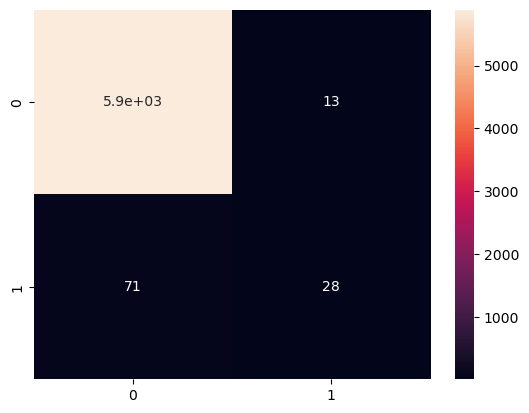

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = cls_svm.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

## Conclusion
### EDA
I found that the dataset ia highlydimensionsal, with 171 column and 60,000 rows. Early data analysis revealed the features were not in the right data type as defined by the data dictionary. 170 features where objects and 1  feture was an integer. The class feature variable was expected to be in object format, leaving 169 feutut=res not in their right furmat. This revealation lead implementation of operations to find unique datas hence infoming decision on how to handle them. I implemented a number of operations such as reading the csv file in baches of 20 to get the unique values in each variable,but this method proved inefficient. Also tried creating a function that loop throgh the entire df anf reture a list of obejects but the function as well was inefficient as the strage for iut out ran out. But was finally able to use regular expresion and repalce method to replace all floats in the data, leaving a new dataframe of all values that are not float. After which i when to explicitly ask pandas to treat unique values as NAN and all features returned to numerical data. The astype method was used to convert all component sensors to floats as defined by data dictinary.
***Class EDA:*** revealed that over 90% of sensor failure where not realated to failures of Air pressure system and less than 10% of sensor failure had to do with air_pressure system failure.
Distribution plots also revealed data was highly skwed and the diffrence between the min and max obsavation in some features where over 20000, and thus afftered modlelling until after normarlization was implement.
### cleaning
Two cleaning methods were implemented, drop and fill method. Component sensor ab_000 had a significantly high number of null values comopared to recorded observation so the columnwas droped. Statistical summary show the data was highly swed, so i replaced the null values with median as this is not sensitive to outliers which was present in the data. 
### scaling: 
Min-Max scaling(normalisation) thechnique was used to scale the features, this was because the data is very skwed and variaous articles refrenced suggects it is better to normalise when the distribution is skwed. 
Also before deciding normalisation was waranted, i tried to do modlelling witout normalisation, and the svm model had computarisation problem, it was taking over 20 minutes traning without a sucessful attempt at traing the indepebdent variable. How evever, after numalizartion, SVM was able to train data. Also pca explained line plot was more readable after normalization that before. 
### PCA:
Principal component analysis was warranted to reduce the dimentionality of the data. After pca explained variance, it was visible, that with approx 25 features, we can retain 99.5% of the variance in the data, which was then implemented accordingly. 
### SVM:
Supervised model, seems appropraite for this task as we are trying the classify positive and negative failures. However, model behaved diffrently at diffrent testing anf traing sizes, 5% test and 95% traing performed best of all. It recorded 98% accuracy and 84% precision. 

In conclusion, implementation of diffrent operations on this project was insighful as i was able to challenge myself to learn more through self directed study. 

# Refrences
1. Hector Cuesta (2013) Practical Data Analysis. Birmingham, UK: Packt Publishing. Available at: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=654543&site=eds-live&scope=site (Accessed: 18 October 2023).
2. McKinney, W. (2017). Pythonic Data Cleaning With Pandas and NumPy. 2nd Edition ed. pp.17–18
3. Arun, K. ed., (2020). Understanding Curse of Dimensionality. [online] Great Learning Blog: Free Resources what Matters to shape your Career! Available at: https://www.mygreatlearning.com/blog/understanding-curse-of-dimensionality/#:~:text=The%20dimension%20of%20a%20dataset [Accessed 1 Nov. 2023].
4. w3school (n.d.). Pandas DataFrame iloc Property. [online] www.w3schools.com. Available at: https://www.w3schools.com/python/pandas/ref_df_iloc.asp#:~:text=Definition%20and%20Usage [Accessed 3 Nov. 2023].
5. Pandas (n.d.). pandas.DataFrame.describe — pandas 1.3.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html.
6. AI Code mentor (2023). AI Code Mentor: Best Tool for Code Optimization, Refactoring, and Review. [online] code-mentor.ai. Available at: https://code-mentor.ai/ [Accessed 3 Nov. 2023].
7.Hubspot (2023). Exploring the Basics of Python Objects and Classes. [online] blog.hubspot.com. Available at: https://blog.hubspot.com/website/python-object#:~:text=What%20is%20an%20object%20in [Accessed 3 Nov. 2023].
6.W3Schools (2019). Python Classes. [online] W3schools.com. Available at: https://www.w3schools.com/python/python_classes.asp.
7. Kuchling, A.M. (2019). Regular Expression HOWTO — Python 3.8.0 documentation. [online] Python.org. Available at: https://docs.python.org/3/howto/regex.html [Accessed 3 Nov. 2023].
8. Gupta, A. (2023). Python Regular Expression (RegEX). [online] Simplilearn.com. Available at: https://www.simplilearn.com/tutorials/python-tutorial/python-regular-expressions [Accessed 3 Nov. 2023].
9. Pandas (n.d.). pandas.DataFrame.astype — pandas 1.4.2 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html [Accessed 4 Nov. 2023].
10. NIST (2023). 1.3.3.14.6. Histogram Interpretation: Skewed (Non-Normal) Right. [online] www.itl.nist.gov. Available at: https://www.itl.nist.gov/div898/handbook/eda/section3/eda33e6.htm#:~:text=Skewed%20data%20often%20occur%20due.
11. Waskom, M. (2023). seaborn.boxplot — seaborn 0.11.1 documentation. [online] seaborn.pydata.org. Available at: https://seaborn.pydata.org/generated/seaborn.boxplot.html [Accessed 4 Nov. 2023].
12. Wellbeing@school (2019). Understanding and interpreting box plots | Wellbeing@School. [online] Wellbeingatschool.org.nz. Available at: https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots.
13. Eddie_4072 (2021). How to Handle Missing Data in Python? [Explained in 5 Easy Steps]. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/#h-1-deleting-the-column-with-missing-data [Accessed 4 Nov. 2023].
14. Gawali, S. (2021). How to Deal with Missing Data using Python. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/how-to-deal-with-missing-data-using-python/#:~:text=Imputation%20using%20Statistics%3A&text=%E2%80%9CMean%E2%80%9D%20will%20replace%20missing%20values [Accessed 4 Nov. 2023].
15. Bhandari, A. (2020). Feature Engineering: Scaling, Normalization, and Standardization (Updated 2023). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#What_Is_Normalization?.
16. Morris, S. (2022). Data Normalization: Definition, Importance, and Advantages. [online] coresignal.com. Available at: https://coresignal.com/blog/data-normalization/#why-is-normalization-important [Accessed 5 Nov. 2023].
17. Gupta, A. (2023). Python Regular Expression (RegEX). [online] Simplilearn.com. Available at: https://www.simplilearn.com/tutorials/python-tutorial/python-regular-expressions [Accessed 3 Nov. 2023].